In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [46]:
master_df = pd.read_csv('../datasets/MASTER_DF.csv')
master_df.head()

,entry,product,reacts,PubChem,SMILES,Mol,Fingerprint,dist,enzyme_class_1,enzyme_class_2,...,enzyme_class_7,n_C,n_H,n_O,n_N,n_P,n_S,n_X,DoU,MW
0,1.14.99.46,C20232,1.0,163311975,C/C(=C/NC(=O)N)/C(=O)OO,<rdkit.Chem.rdchem.Mol object at 0x1a7c6372b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.421512,1,0,...,0,5.0,8.0,4.0,2.0,0.0,0.0,0.0,3.0,160.129
1,3.5.1.110,C20232,1.0,163311975,C/C(=C/NC(=O)N)/C(=O)OO,<rdkit.Chem.rdchem.Mol object at 0x1a7c637300>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.467093,0,0,...,0,5.0,8.0,4.0,2.0,0.0,0.0,0.0,3.0,160.129
2,1.14.99.46,C00178,1.0,3478,CC1=CNC(=O)NC1=O,<rdkit.Chem.rdchem.Mol object at 0x1a7c637210>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.421512,1,0,...,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115
3,1.17.99.4,C00178,1.0,3478,CC1=CNC(=O)NC1=O,<rdkit.Chem.rdchem.Mol object at 0x1a7c637620>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.414081,1,0,...,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115
4,1.3.1.1,C00178,1.0,3478,CC1=CNC(=O)NC1=O,<rdkit.Chem.rdchem.Mol object at 0x1a7c637670>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.420926,1,0,...,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115


In [3]:
feature_df = master_df.iloc[:,7:24].copy() # selects all 17 columns of features and makes a new dataframe of them
feature_df.head()

,dist,enzyme_class_1,enzyme_class_2,enzyme_class_3,enzyme_class_4,enzyme_class_5,enzyme_class_6,enzyme_class_7,n_C,n_H,n_O,n_N,n_P,n_S,n_X,DoU,MW
0,0.421512,1,0,0,0,0,0,0,5.0,8.0,4.0,2.0,0.0,0.0,0.0,3.0,160.129
1,0.467093,0,0,1,0,0,0,0,5.0,8.0,4.0,2.0,0.0,0.0,0.0,3.0,160.129
2,0.421512,1,0,0,0,0,0,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115
3,0.414081,1,0,0,0,0,0,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115
4,0.420926,1,0,0,0,0,0,0,5.0,6.0,2.0,2.0,0.0,0.0,0.0,4.0,126.115


In [4]:
features = np.array(feature_df) # shape balance array for regression
reactions = list(master_df['reacts']) # reads reaction column of master_df as a list

feature_train, feature_test, reaction_train, reaction_test = train_test_split(features, reactions,
                                                    test_size=0.20) # split

In [29]:
# this is the active model, please use.
# leave feautre_train and reaction_train the same
# change feature_test and into whatever your query input is. I will mark lines with ###

model_1 = linear_model.LogisticRegression(solver='liblinear', penalty='l1', random_state=1)
model_1.fit(feature_train, np.ravel(reaction_train)) # reshape list into 1D array
predictions = model_1.predict(feature_test) ###

predictions

array([0., 0., 0., ..., 1., 0., 0.])

In [28]:
predictions = list(predictions)

In [146]:
prediction_df = pd.DataFrame(feature_test, columns=feature_df.columns)
prediction_df['predictions']  = list(predictions)
prediction_df.head()

,dist,enzyme_class_1,enzyme_class_2,enzyme_class_3,enzyme_class_4,enzyme_class_5,enzyme_class_6,enzyme_class_7,n_C,n_H,n_O,n_N,n_P,n_S,n_X,DoU,MW,predictions
0,0.362330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,24.0,4.0,1.0,0.0,0.0,0.0,9.5,342.415,0.0
1,0.398671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0,2.0,2.0,0.0,0.0,0.0,2.0,130.147,0.0
2,0.397756,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,44.0,2.0,0.0,0.0,0.0,0.0,6.0,400.647,0.0
3,0.293841,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,1.0,1.0,0.0,0.0,0.0,1.0,73.095,0.0
4,0.322531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,1.0,2.0,0.0,0.0,0.0,2.0,128.175,0.0


In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
prediction_array = prediction_df.values

In [139]:
#foo = np.delete(prediction_array, np.s_[1:8], 1)
#foo = pd.DataFrame(foo, columns=labels)
labels = ['dist','n_C','n_H','n_O','n_N','n_P','n_S','n_X','DoU','MW','predictions']

In [140]:
foo.head()

,dist,n_C,n_H,n_O,n_N,n_P,n_S,n_X,DoU,MW,predictions
0,0.362330,20.0,24.0,4.0,1.0,0.0,0.0,0.0,9.5,342.415,0.0
1,0.398671,5.0,10.0,2.0,2.0,0.0,0.0,0.0,2.0,130.147,0.0
2,0.397756,27.0,44.0,2.0,0.0,0.0,0.0,0.0,6.0,400.647,0.0
3,0.293841,3.0,7.0,1.0,1.0,0.0,0.0,0.0,1.0,73.095,0.0
4,0.322531,6.0,12.0,1.0,2.0,0.0,0.0,0.0,2.0,128.175,0.0


In [141]:
import seaborn as sns

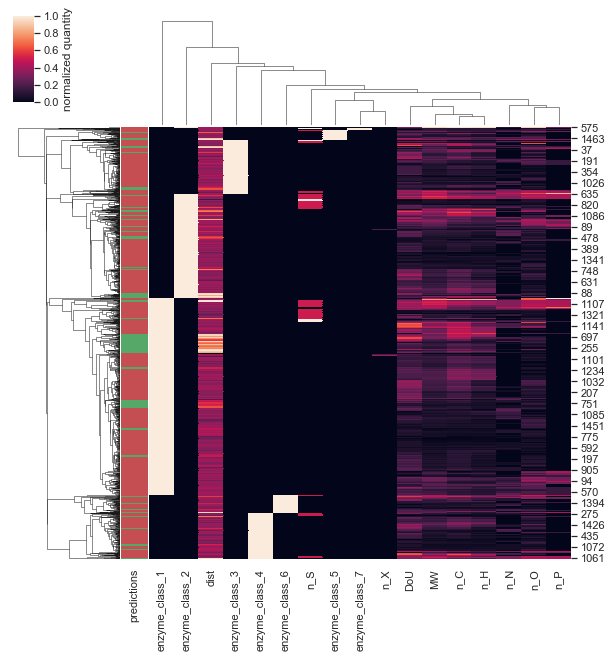

In [147]:
cbar_kws = {'label': 'normalized quantity'}

#kwargs={'xticklabels': labels}

pop = prediction_df.pop('predictions')

zipped = dict(zip(pop.unique(), "rg"))

row_colors = pop.map(zipped)

sns.clustermap(prediction_df, standard_scale=1, cbar_kws=cbar_kws, row_colors=row_colors)#, **kwargs)